In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('/Users/harshitmasiwal/Downloads/student extended dataset/Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [26]:
df.describe()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [30]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# drop column Unnamed: 0

In [40]:
df.drop(columns = 'Unnamed: 0',inplace = True)

df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender Distribution


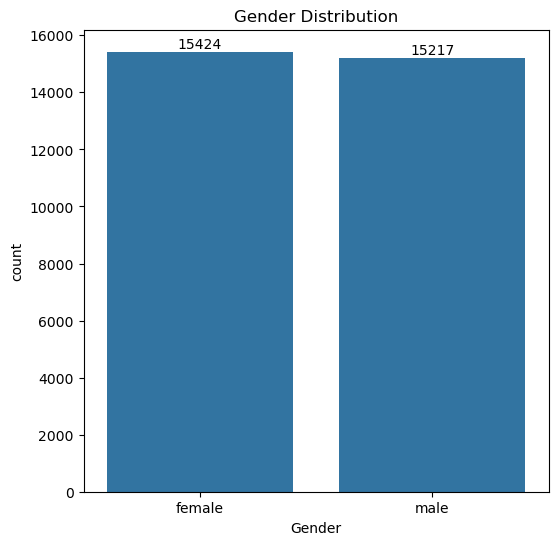

In [127]:
plt.figure(figsize =(6,6))
ax = sns.countplot(data = df, x = 'Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

# From the above chart we have analysed that :
# no. of females in the data are more than the no. of males

In [111]:
gb = df.groupby('ParentEduc')[['MathScore','ReadingScore','WritingScore']].mean()

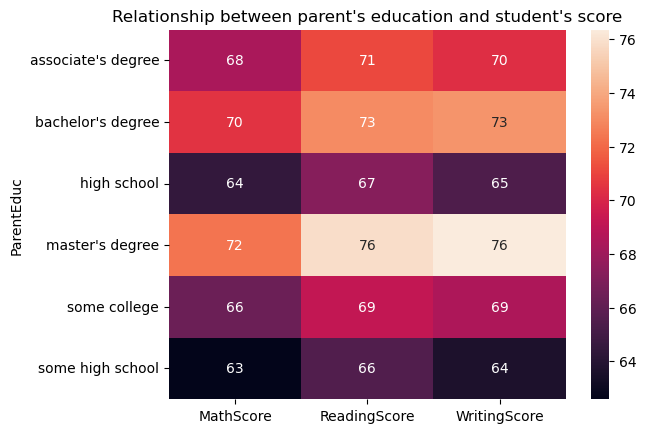

In [129]:
sns.heatmap(gb,annot = True)
plt.title("Relationship between parent's education and student's score")
plt.show()

# From the above chart we have concluded that the education of the parent have a good impact on their scores

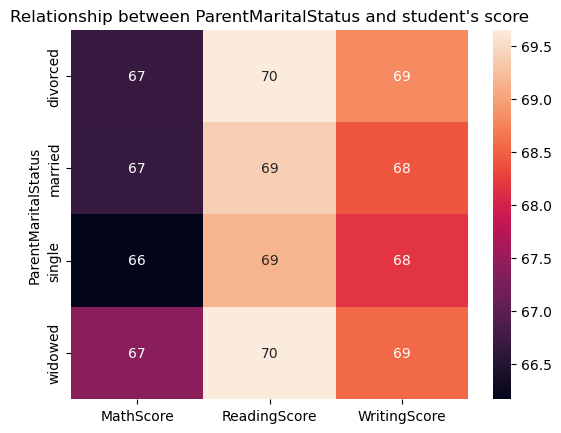

In [139]:
gb = df.groupby('ParentMaritalStatus')[['MathScore','ReadingScore','WritingScore']].mean()
gb
sns.heatmap(gb,annot = True)
plt.title("Relationship between ParentMaritalStatus and student's score")
plt.show()

#
From the above chart we have concluded that the ParentMaritalStatus  have negligible impact on the student scores

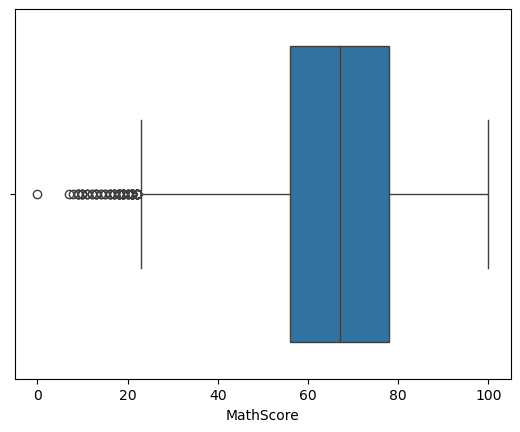

In [152]:
sns.boxplot(data = df, x = 'MathScore')
plt.show()


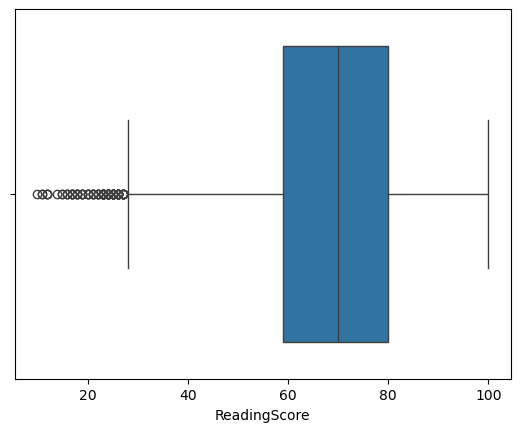

In [174]:
sns.boxplot(data = df, x ='ReadingScore')
plt.show()

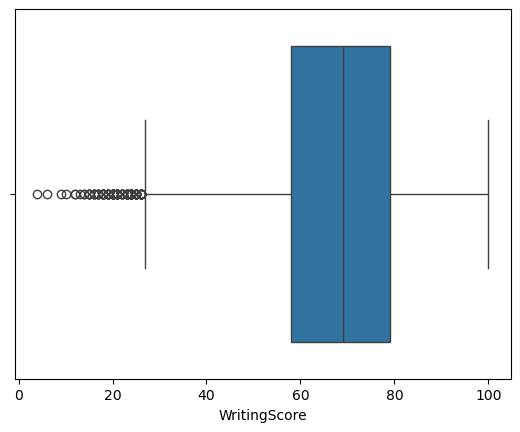

In [176]:
sns.boxplot(data = df, x = 'WritingScore')
plt.show()

# Ethnic Group distribution

In [191]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

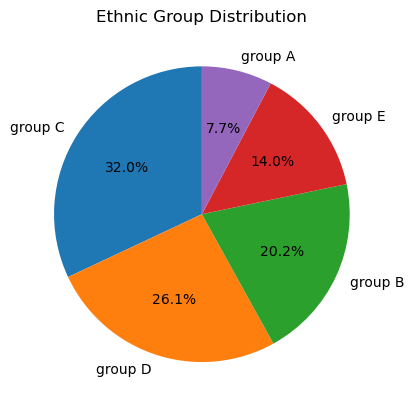

In [274]:
ethnic_count = df['EthnicGroup'].value_counts()
plt.pie(ethnic_count ,labels = ethnic_count.index,autopct = '%1.1f%%',startangle = 90)
plt.title('Ethnic Group Distribution')
plt.show()


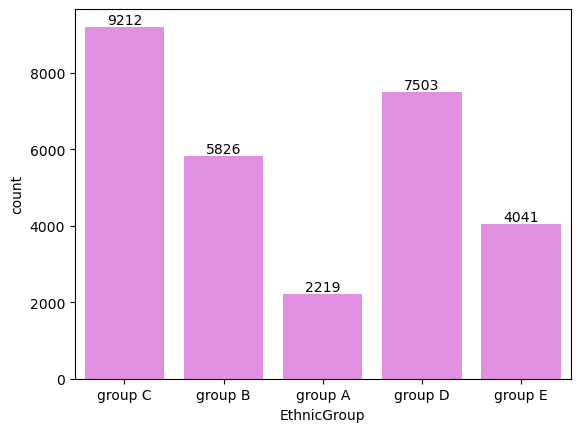

In [286]:
ax = sns.countplot(data = df,x = 'EthnicGroup',color = 'violet')
ax.bar_label(ax.containers[0])
plt.show()


In [312]:

df['PracticeSport'].info

<bound method Series.info of 0        regularly
1        sometimes
2        sometimes
3            never
4        sometimes
           ...    
30636    sometimes
30637    regularly
30638    sometimes
30639    regularly
30640        never
Name: PracticeSport, Length: 30641, dtype: object>

In [314]:
GB = df.groupby('PracticeSport')[['MathScore','ReadingScore','WritingScore']].mean()
GB

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


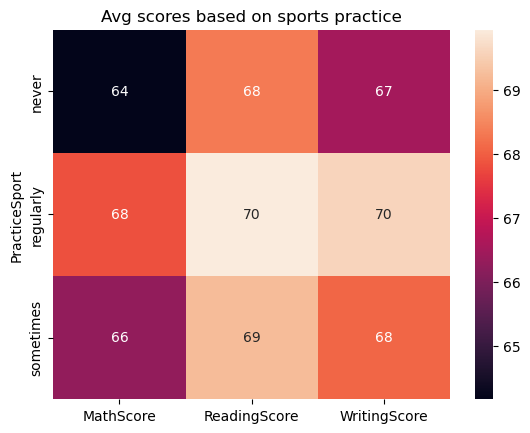

In [348]:
sns.heatmap(GB,annot = True)
plt.title("Avg scores based on sports practice")
plt.show()

In [324]:
# This states that the students who are intrested in sports have more knowledge than students who never play sports"

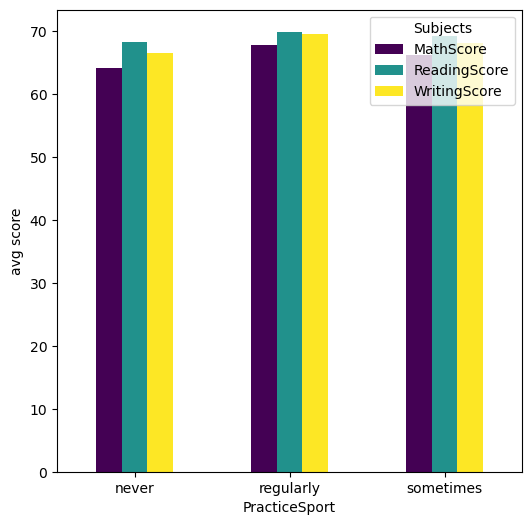

In [378]:
ax = GB.plot(kind  = 'bar',figsize = (6,6),colormap = 'viridis')

plt.xticks(rotation=0)
plt.ylabel('avg score')
plt.legend(title='Subjects', loc = 'upper right')
plt.show()